In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

cv_19  = pd.read_csv('covid-19-malaysia.csv')
cv_death = pd.read_csv('covid-19-my-death-cases.csv')
state_case = pd.read_csv('covid-19-my-states-cases.csv')
cv_death['states']=cv_death['states'].replace('terrenganu','terengganu')
cv_19.discharged.max()
cv_19

,date,cases,discharged,death,icu
0,24/1/2020,0,0,0,0
1,25/1/2020,3,0,0,0
2,26/1/2020,4,0,0,0
3,27/1/2020,4,0,0,0
4,28/1/2020,4,0,0,0
...,...,...,...,...,...
232,12/9/2020,9868,9189,128,9
233,13/9/2020,9915,9196,128,9
234,14/9/2020,9946,9203,128,11
235,15/9/2020,9969,9209,128,14


wp-kuala-lumpur    2625.0
selangor           2199.0
negeri-sembilan    1043.0
dtype: float64


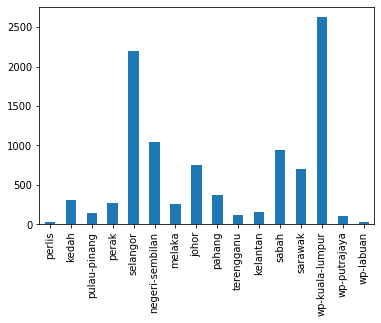

In [2]:
state_case.dropna(inplace=True)
state_case['wp-putrajaya'] = state_case['wp-putrajaya'].replace('-', 0)
state_case['wp-putrajaya'] = state_case['wp-putrajaya'].astype('float')
s = state_case.set_index('date')
summ = s.max()
print(summ.nlargest(3))
summ.plot.bar()

In [3]:
comb_19 = cv_19.merge(state_case, on='date').dropna()
comb_19['wp-putrajaya'] = comb_19['wp-putrajaya'].replace('-',0)
comb_19['wp-putrajaya'] = comb_19['wp-putrajaya'].astype('float')
comb_19

,date,cases,discharged,death,icu,perlis,kedah,pulau-pinang,perak,selangor,...,melaka,johor,pahang,terengganu,kelantan,sabah,sarawak,wp-kuala-lumpur,wp-putrajaya,wp-labuan
0,13/3/2020,197,32,0,4,1.0,5.0,7.0,2.0,87.0,...,1.0,20.0,2.0,0.0,3.0,15.0,0.0,40.0,1.0,2.0
1,14/3/2020,238,35,0,5,2.0,5.0,7.0,2.0,92.0,...,6.0,22.0,2.0,0.0,3.0,26.0,6.0,43.0,1.0,2.0
2,16/3/2020,553,42,0,12,8.0,31.0,15.0,18.0,144.0,...,14.0,52.0,19.0,4.0,18.0,57.0,21.0,106.0,0.0,4.0
3,17/3/2020,673,49,2,12,8.0,31.0,23.0,23.0,161.0,...,17.0,77.0,28.0,7.0,25.0,82.0,29.0,113.0,0.0,4.0
4,18/3/2020,790,60,2,15,8.0,36.0,30.0,28.0,192.0,...,18.0,88.0,29.0,10.0,30.0,103.0,49.0,119.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,12/9/2020,9868,9189,128,9,33.0,289.0,138.0,269.0,2193.0,...,262.0,752.0,371.0,114.0,160.0,808.0,700.0,2618.0,99.0,23.0
183,13/9/2020,9915,9196,128,9,33.0,303.0,138.0,269.0,2194.0,...,262.0,752.0,371.0,114.0,160.0,839.0,700.0,2619.0,99.0,23.0
184,14/9/2020,9946,9203,128,11,33.0,304.0,138.0,269.0,2194.0,...,262.0,752.0,371.0,114.0,160.0,864.0,700.0,2620.0,99.0,23.0
185,15/9/2020,9969,9209,128,14,33.0,304.0,138.0,269.0,2199.0,...,262.0,752.0,371.0,114.0,160.0,877.0,700.0,2625.0,99.0,23.0


In [4]:
comb_19 = comb_19.drop(columns=['date','icu','wp-putrajaya','wp-labuan'])

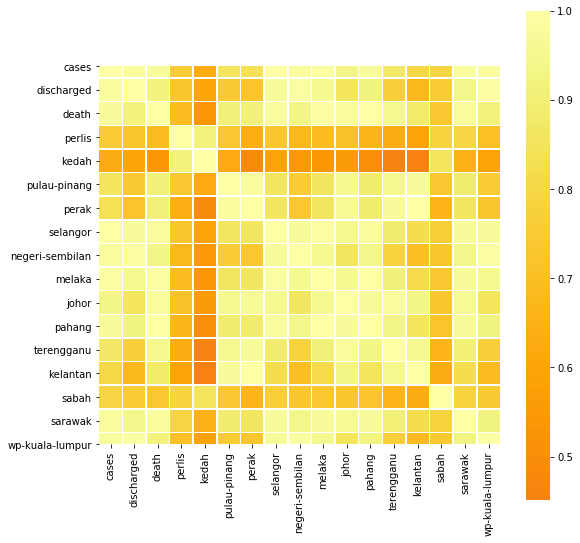

In [5]:
n_r=comb_19.corr()

fig, ax = plt.subplots(figsize=(9,9))
sns.heatmap(n_r, center=0, cmap='inferno', square=True, linewidths=.5, cbar={"shrink":.5}, ax=ax)

In [6]:
death = cv_death.fillna(method='bfill')
d = []
dups = death.pivot_table(index = 'states', aggfunc ='size') 
dups

death_cv = pd.DataFrame(dups)
death_cv = death_cv.reset_index()
death_cv = death_cv.rename(columns={0:'death'})
death_cv

,states,death
0,johor,22
1,kedah,3
2,kelantan,3
3,kuala-lumpur,27
4,melaka,5
5,negeri-sembilan,8
6,pahang,7
7,penang,2
8,perak,6
9,perlis,1


In [7]:
state_case = state_case.dropna()
state = []
for i in state_case.columns:
    state.append([i,state_case[i].max()])
statess = pd.DataFrame(state)
statess=statess.rename(columns={0:'states',1:'total_cases'})
statess['states'] = statess['states'].replace('wp-kuala-lumpur','kuala-lumpur')
statess['states'] = statess['states'].replace('pulau-pinang','penang')
statess.drop(statess.index[0], inplace=True)
statess

,states,total_cases
1,perlis,33
2,kedah,305
3,penang,139
4,perak,269
5,selangor,2199
6,negeri-sembilan,1043
7,melaka,262
8,johor,752
9,pahang,371
10,terengganu,114


Text(0.5, 1.0, 'North Region')

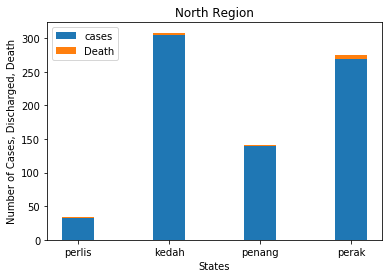

In [8]:
dah_merge = statess.merge(death_cv, on='states')
dah_merge['total_cases'] = dah_merge['total_cases'].astype('int64')
dah_merge = dah_merge.drop_duplicates('states')
final = dah_merge.reset_index(drop=True)
north_r = final[final['states'].isin(['perlis','penang','kedah','perak'])]
east_r = final[final['states'].isin(['pahang','terengganu','kelantan'])]
central_r = final[final['states'].isin(['selangor','kuala-lumpur'])]
south_r = final[final['states'].isin(['negeri-sembilan','melaka','johor'])]
east_m = final[final['states'].isin(['sabah','sarawak'])]

#plotting time
fig,ax = plt.subplots()

#north_region
ax.bar(north_r.states, north_r.total_cases, width=0.35, label='cases')
ax.bar(north_r.states, north_r.death, width=0.35, bottom=north_r.total_cases, label='Death')
ax.legend()
ax.set_xlabel('States')
ax.set_ylabel('Number of Cases, Discharged, Death')
ax.set_title('North Region')

Text(0.5, 1.0, 'East Region')

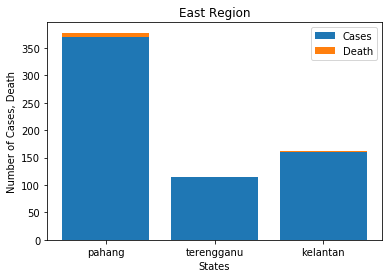

In [9]:
east_r.reset_index(inplace=True)
fig,ax2 = plt.subplots()
ax2.bar(east_r.states, east_r.total_cases, label='Cases')
ax2.bar(east_r.states, east_r.death,bottom=east_r.total_cases, label='Death')
ax2.legend()
ax2.set_xlabel('States')
ax2.set_ylabel('Number of Cases, Death')
ax2.set_title('East Region')

Text(0.5, 1.0, 'Central Region')

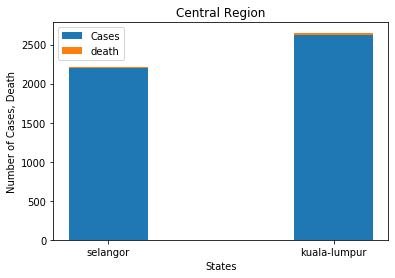

In [10]:
central_r.reset_index(inplace=True)
fig, ax3 = plt.subplots()
ax3.bar(central_r.states, central_r.total_cases, width=0.35, label='Cases')
ax3.bar(central_r.states, central_r.death, bottom=central_r.total_cases, width=0.35, label='death')
ax3.legend()
ax3.set_xlabel('States')
ax3.set_ylabel('Number of Cases, Death')
ax3.set_title('Central Region')

Text(0.5, 1.0, 'South Region')

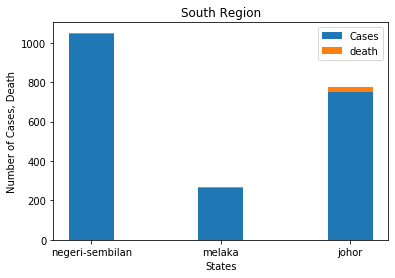

In [11]:
south_r.reset_index(inplace=True)
fig, ax4 = plt.subplots()
ax4.bar(south_r.states, south_r.total_cases, width=0.35, label='Cases')
ax4.bar(south_r.states, south_r.death, bottom=south_r.total_cases, width=0.35, label='death')
ax4.legend()
ax4.set_xlabel('States')
ax4.set_ylabel('Number of Cases, Death')
ax4.set_title('South Region')

Text(0.5, 1.0, 'East Malaysia Region')

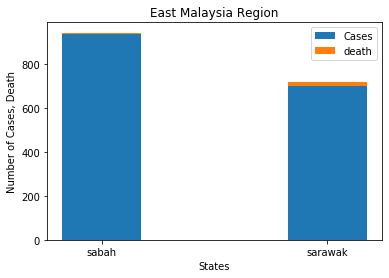

In [12]:
east_m.reset_index(inplace=True)
fig, ax5 = plt.subplots()
ax5.bar(east_m.states, east_m.total_cases, width=0.35, label='Cases')
ax5.bar(east_m.states, east_m.death, bottom=east_m.total_cases, width=0.35, label='death')
ax5.legend()
ax5.set_xlabel('States')
ax5.set_ylabel('Number of Cases, Death')
ax5.set_title('East Malaysia Region')

old       75
middle    18
young      4
Name: Age_group, dtype: int64
total death:  128


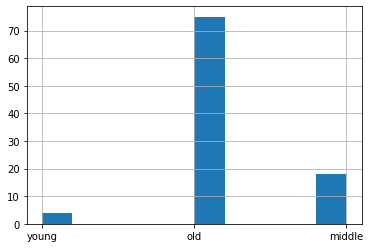

In [14]:
male = cv_death[cv_death.gender == 'm']
m = male.fillna(method='bfill')
m['age']=m['age'].replace('??',np.nan)
m = m.dropna()
m['age']=m['age'].astype('int64')
young = (m['age']>18) & (m['age']<=35)
middle = (m['age']>35) & (m['age']<=55)
old = m['age']>55
m.loc[young,'Age_group']='young'
m.loc[middle,'Age_group']='middle'
m.loc[old, 'Age_group']='old'

print(m.Age_group.value_counts())
print('total death: ',len(cv_death))
m.Age_group.hist()